In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [65]:
import yfinance as yf

# Define the ticker symbol
tickerSymbol = 'NVDA'

# Get data for NVDA at hourly intervals for the past 7 days
df = yf.download(tickerSymbol, period="60d", interval="30m")
print(df.info())

c:\Users\sinaz\.conda\envs\sina\Lib\site-packages\yfinance\scrapers\history.py:231: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  quotes2 = quotes.resample('30T')
[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 780 entries, 2023-12-07 09:30:00 to 2024-03-05 15:30:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       780 non-null    float64
 1   High       780 non-null    float64
 2   Low        780 non-null    float64
 3   Close      780 non-null    float64
 4   Adj Close  780 non-null    float64
 5   Volume     780 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 42.7 KB
None


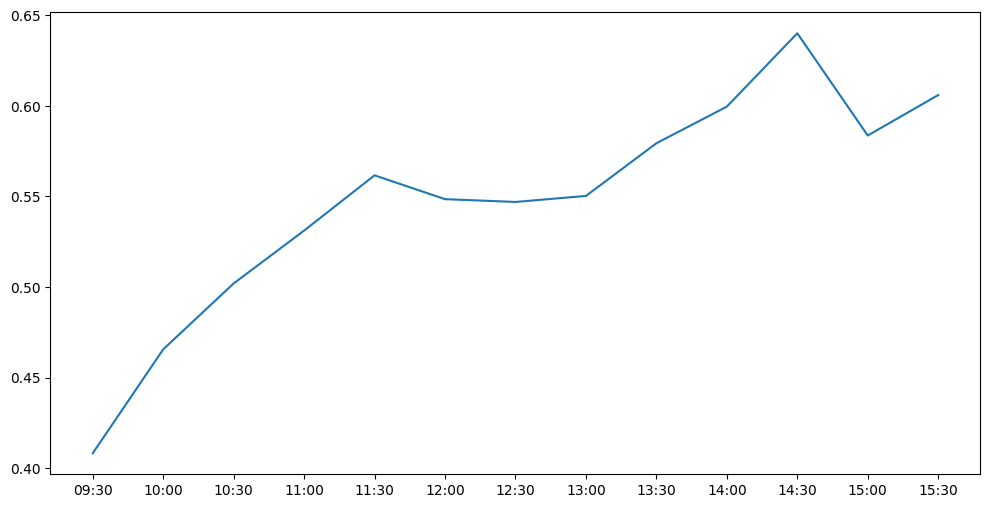

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

daily_df = df.groupby(df.index.date)
y_values_normalized = []
for date, data in daily_df['Adj Close']:
    x_normalized = data.index.strftime('%H:%M')
    y_normalized = scaler.fit_transform(data.values.reshape(-1, 1))
    y_values_normalized.append(y_normalized)
plt.figure(figsize=(12, 6))
vals = np.mean(y_values_normalized, axis=0)
plt.plot(x_normalized, vals)

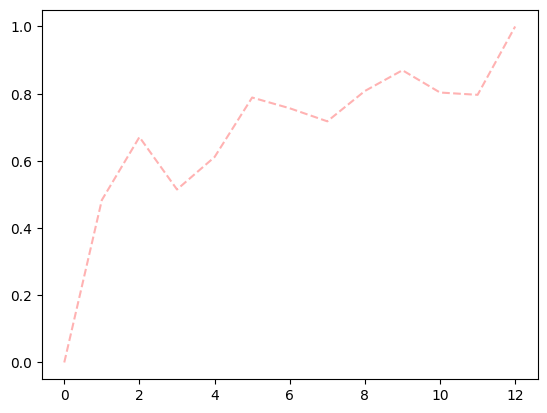

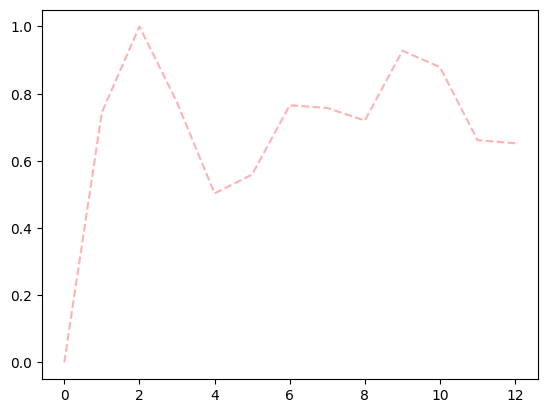

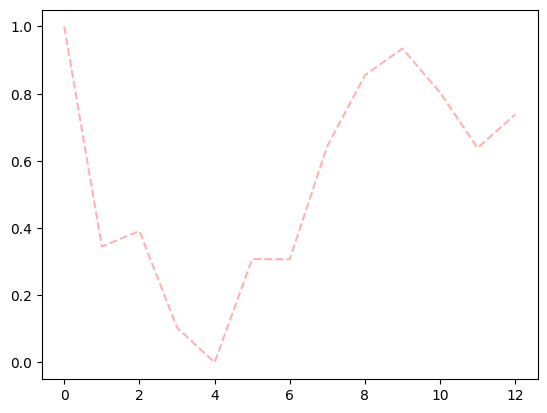

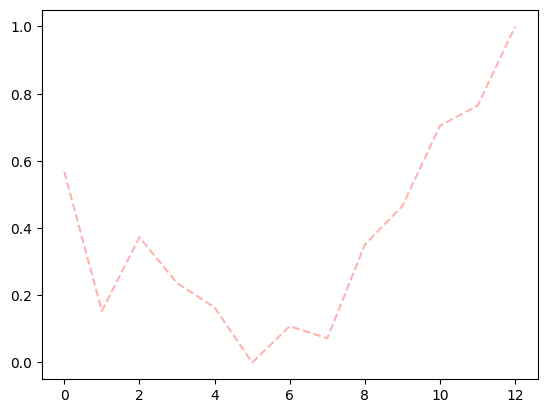

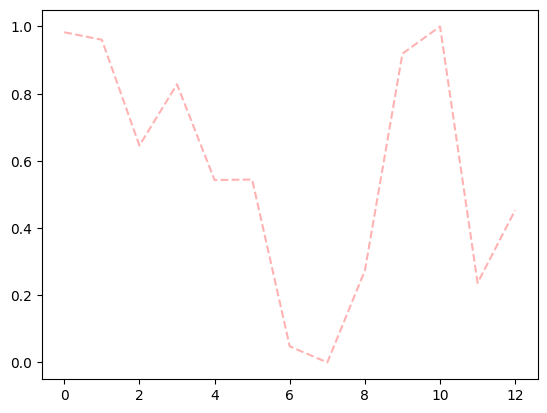

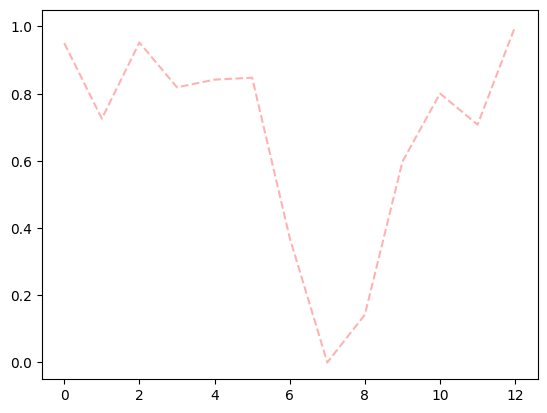

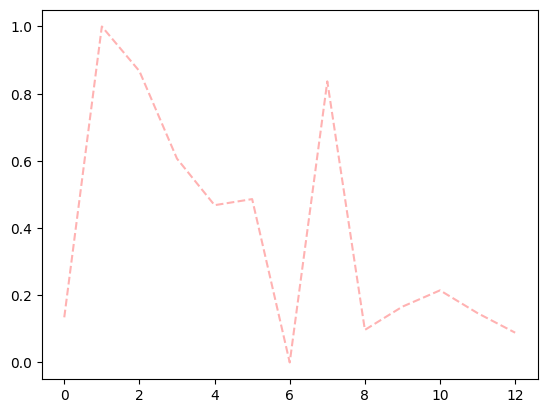

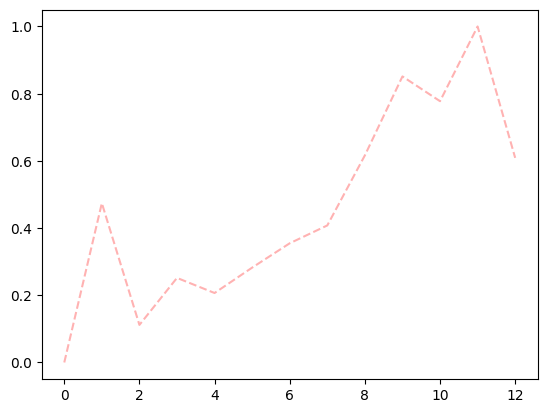

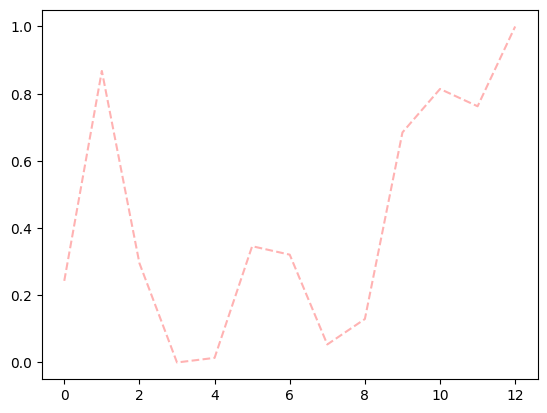

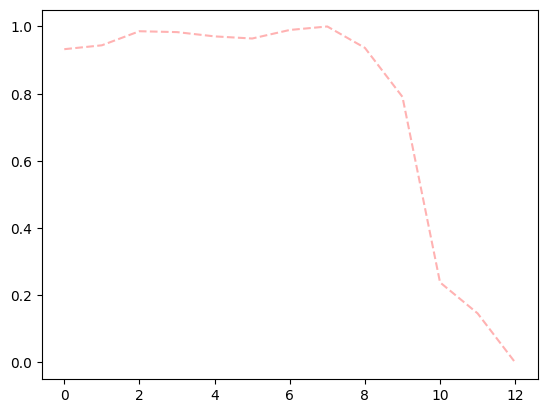

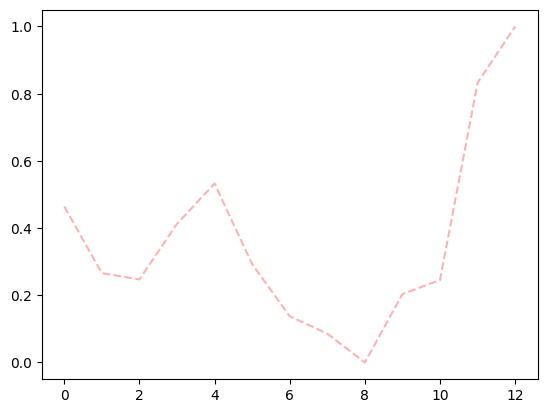

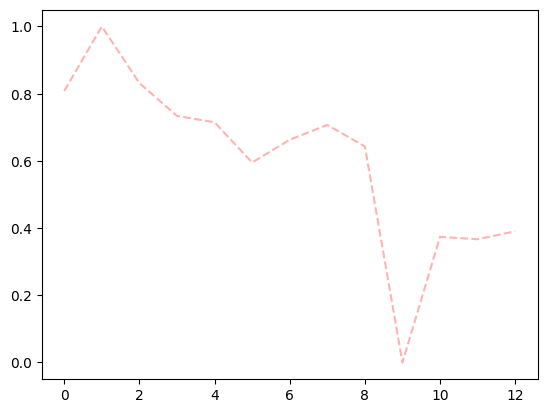

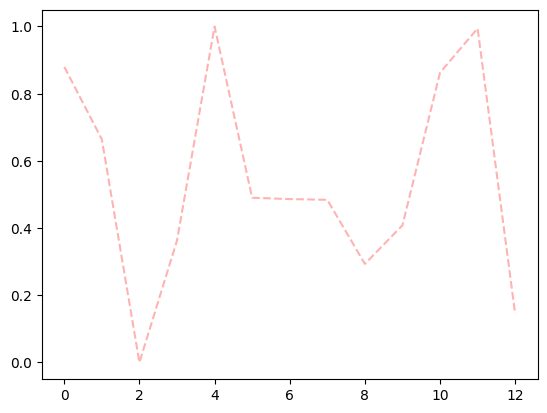

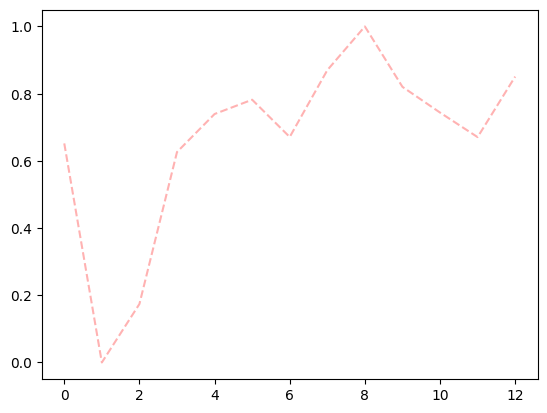

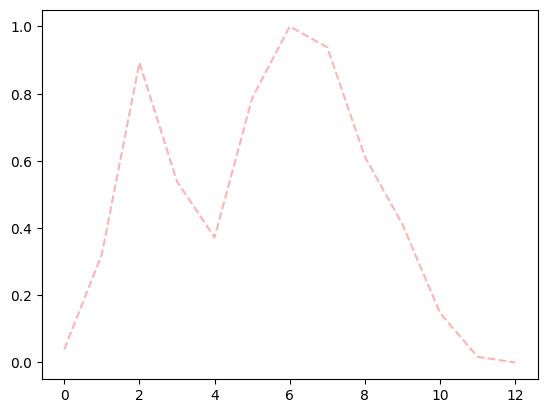

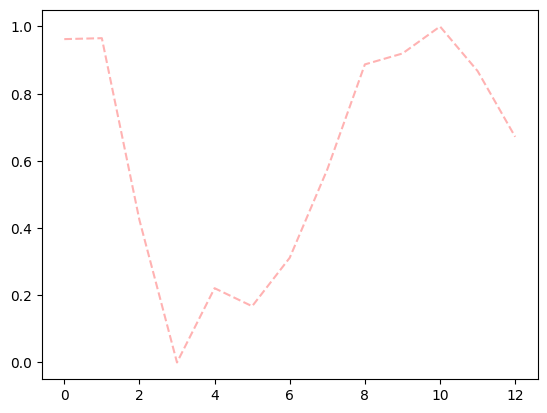

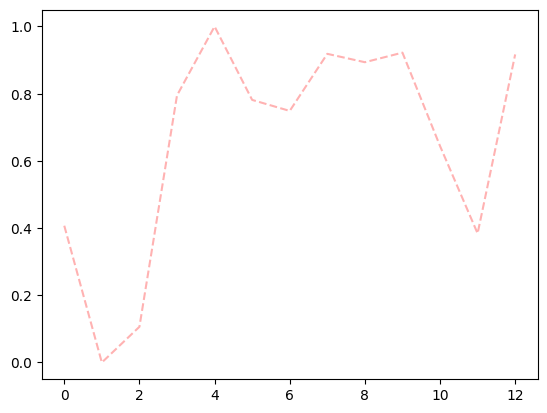

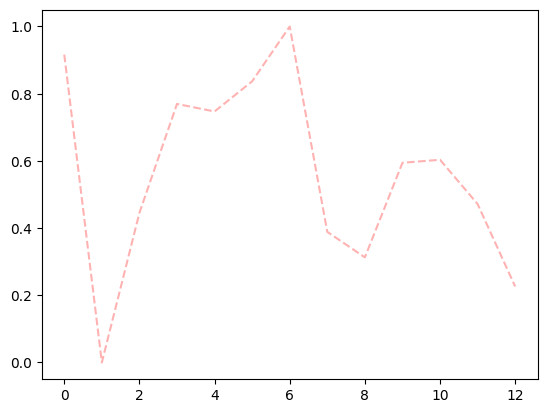

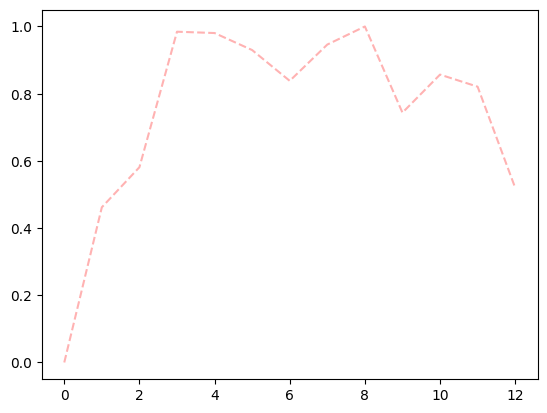

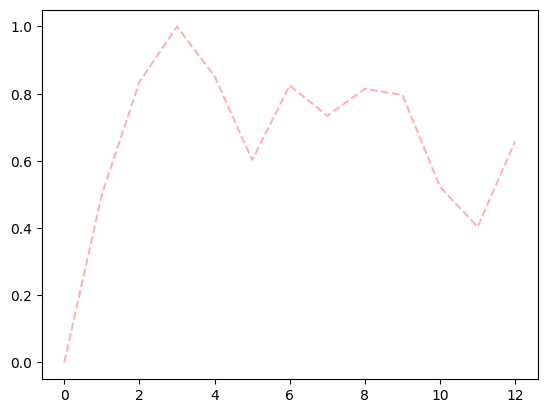

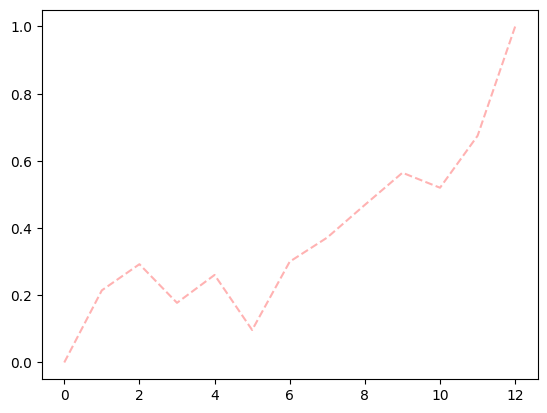

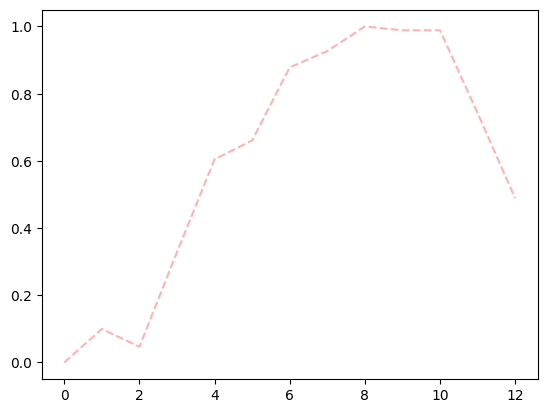

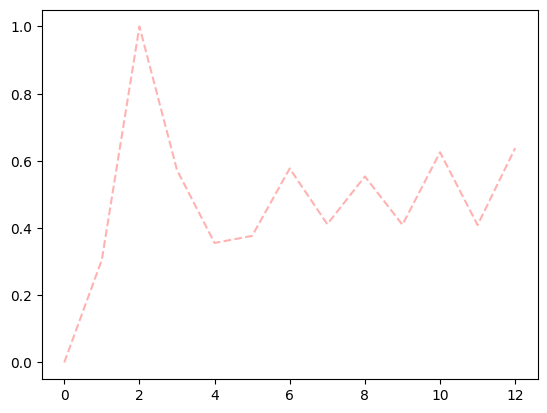

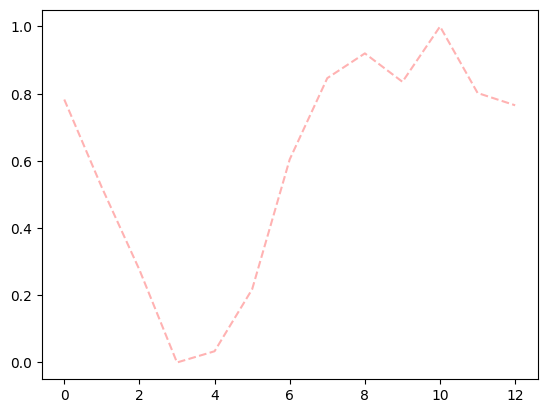

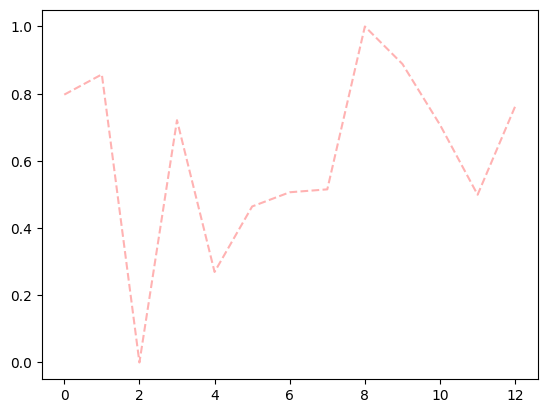

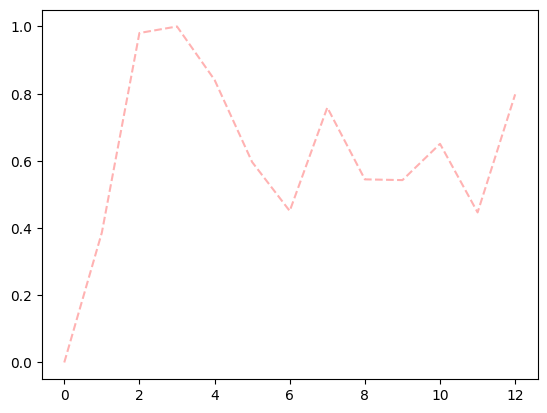

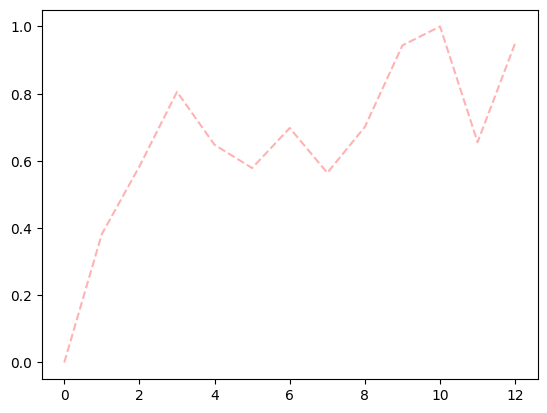

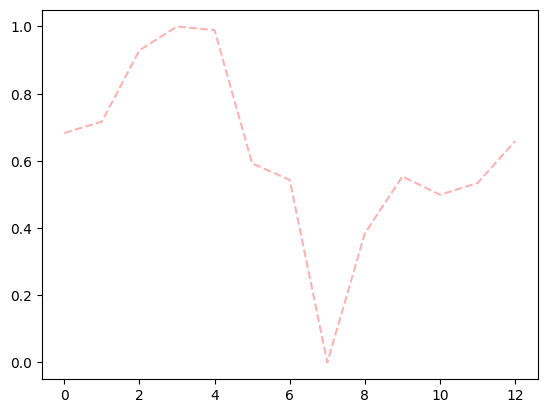

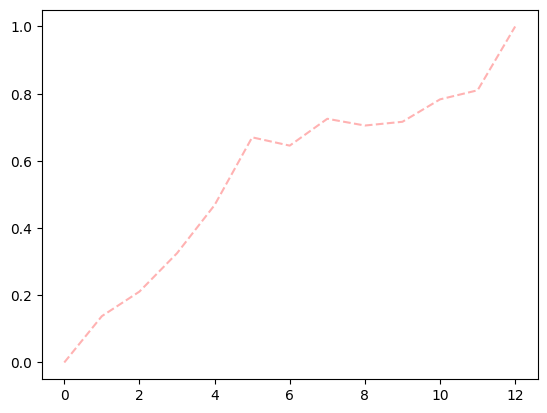

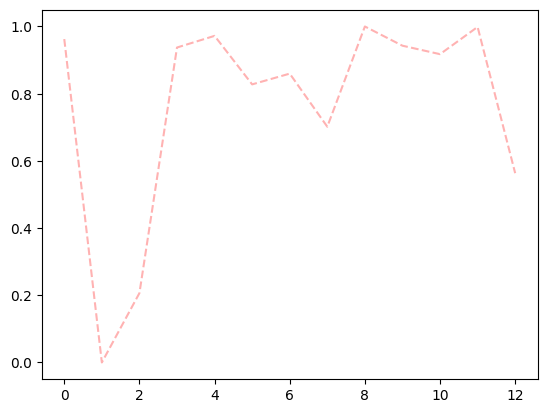

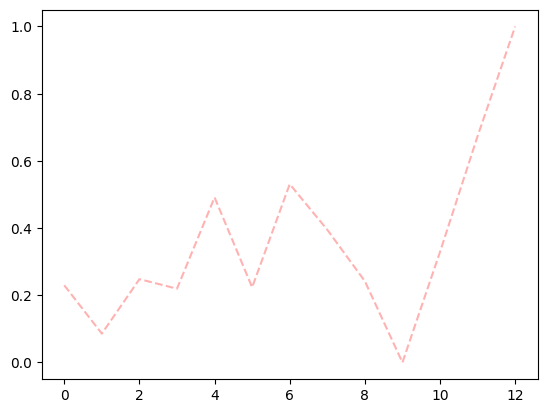

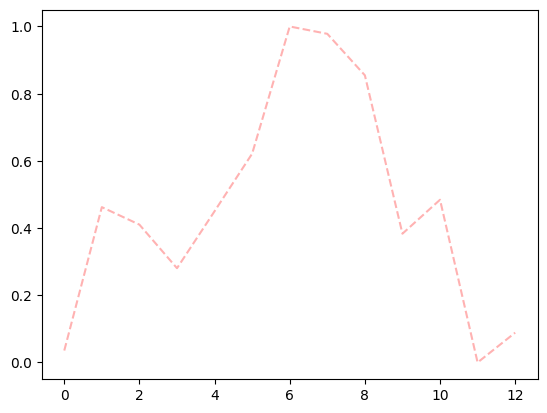

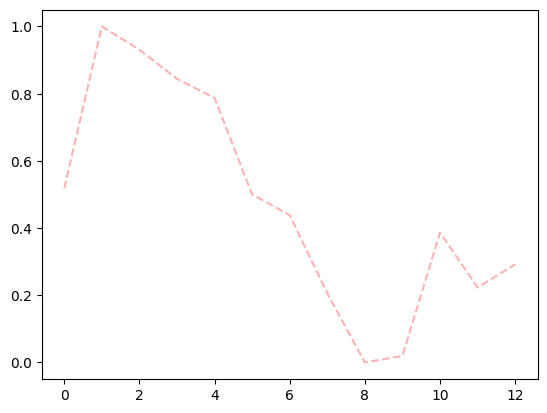

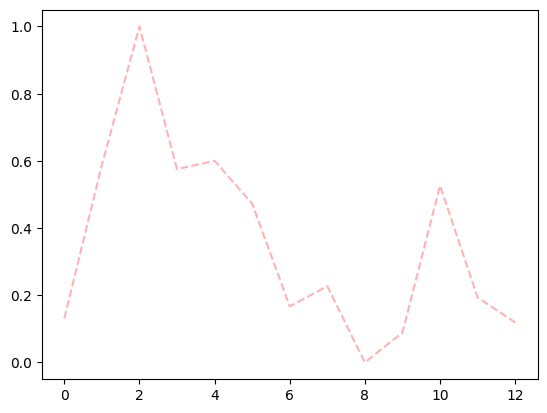

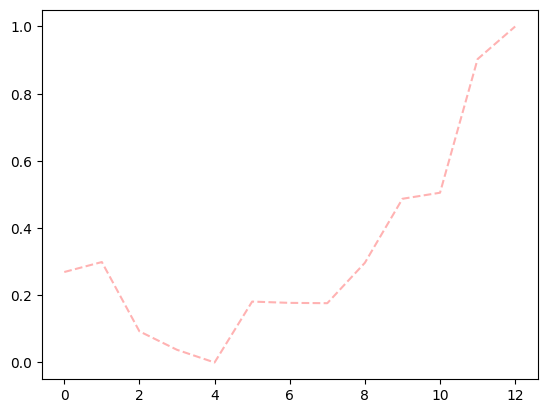

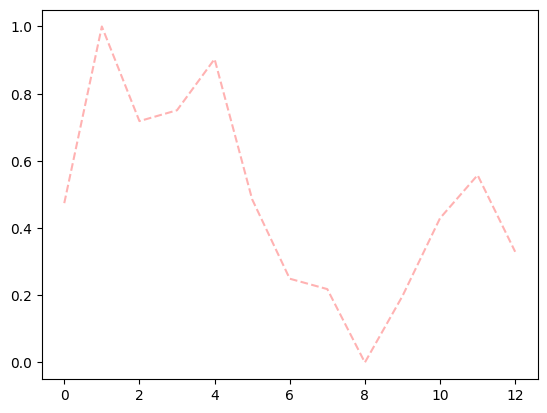

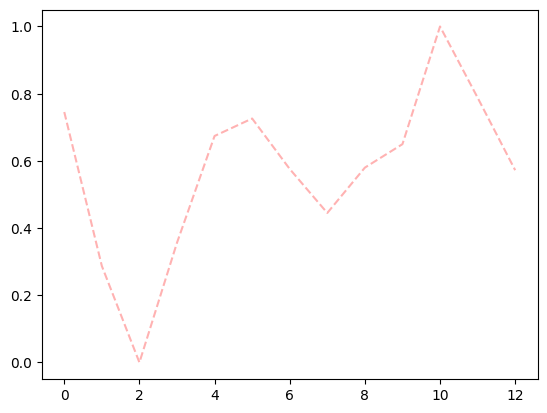

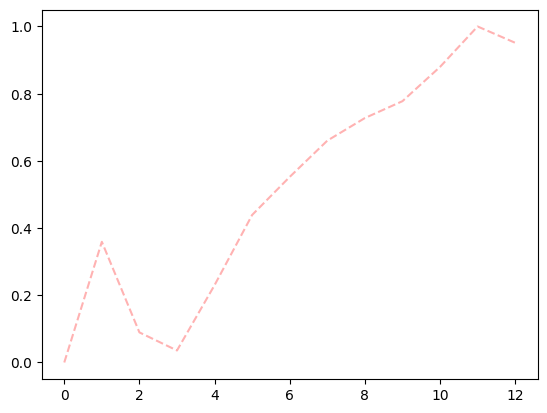

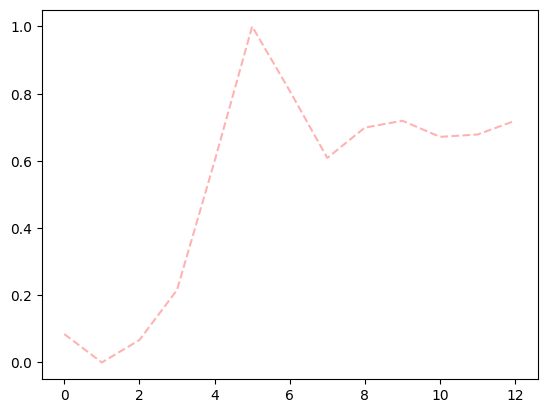

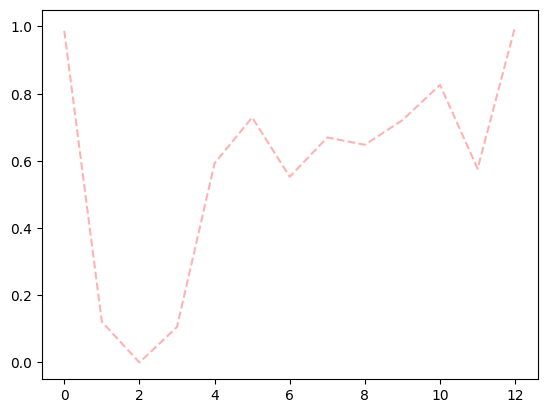

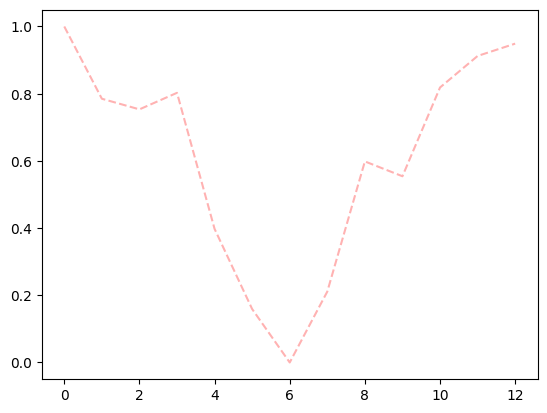

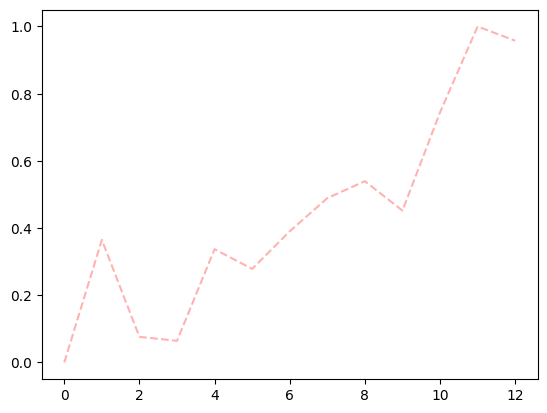

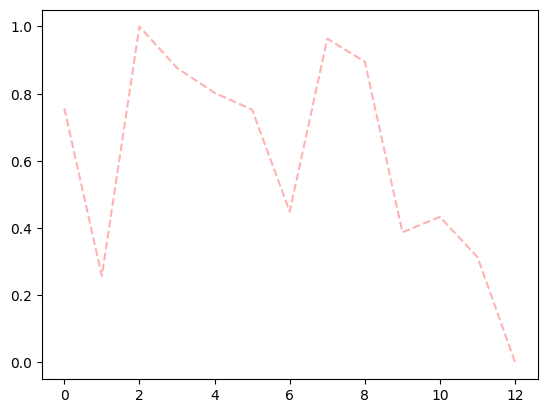

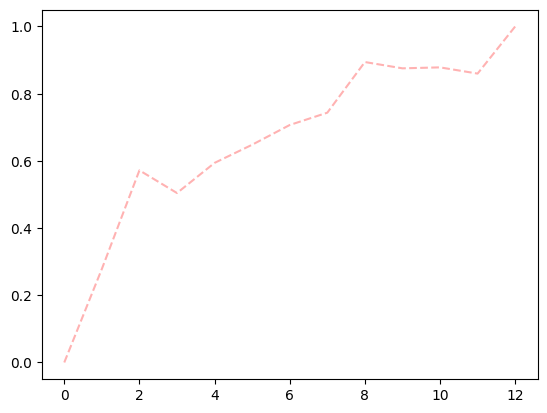

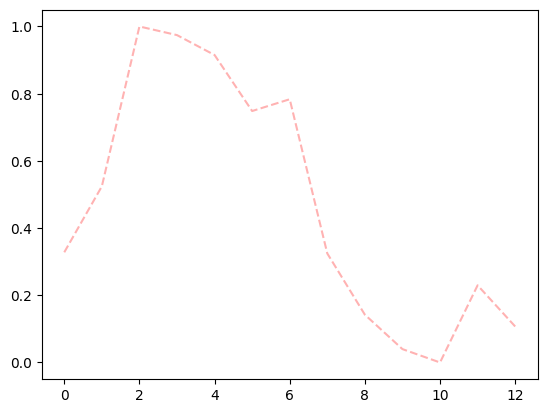

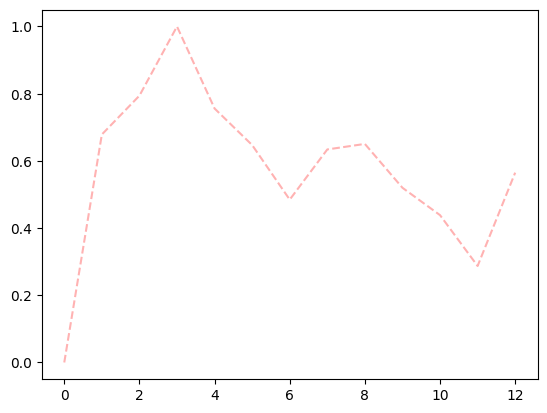

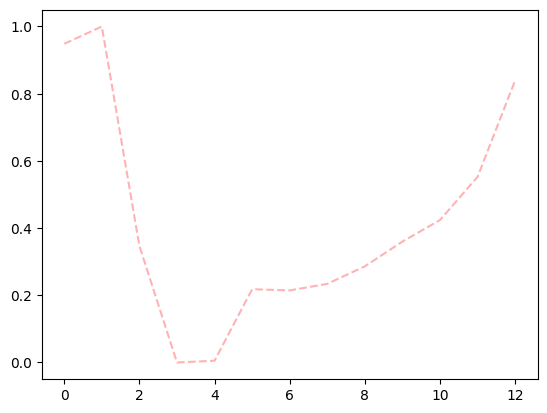

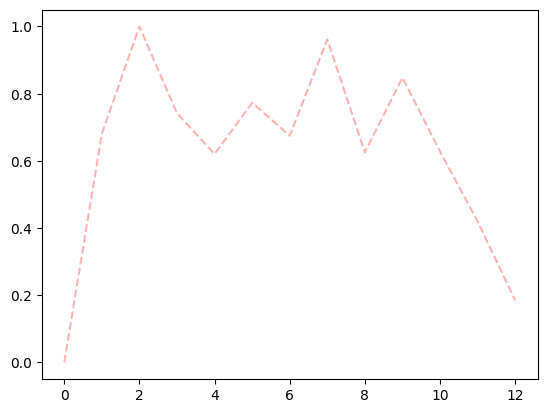

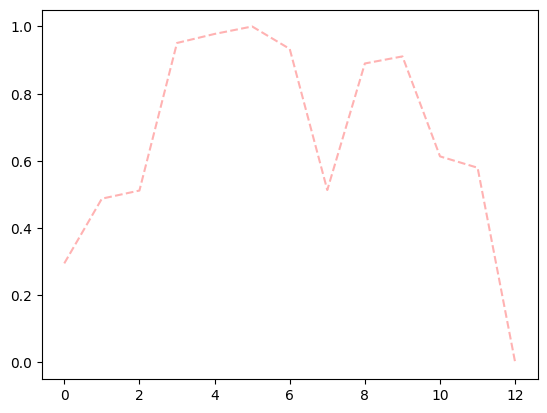

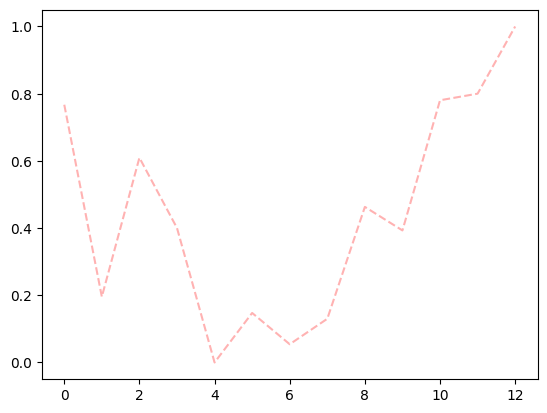

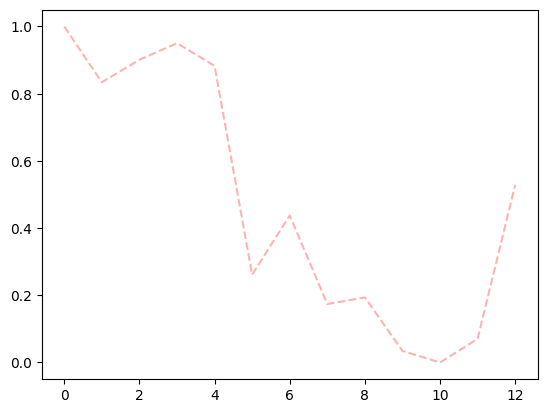

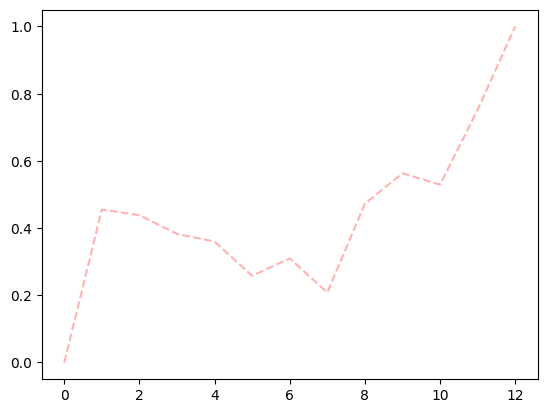

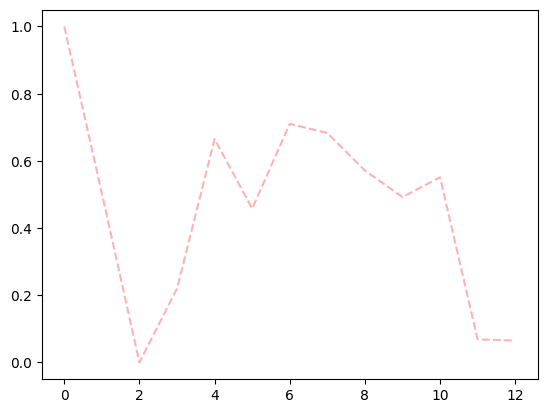

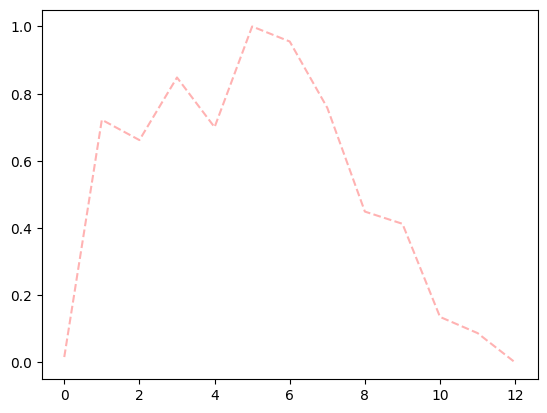

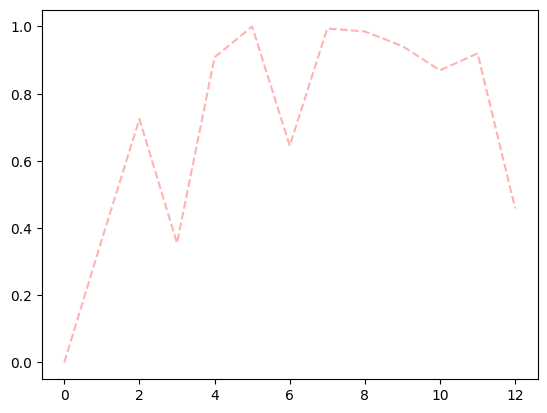

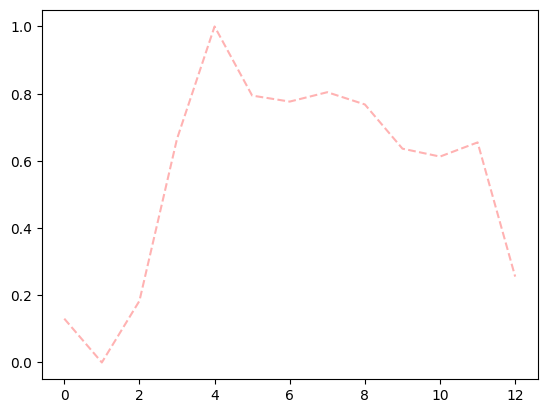

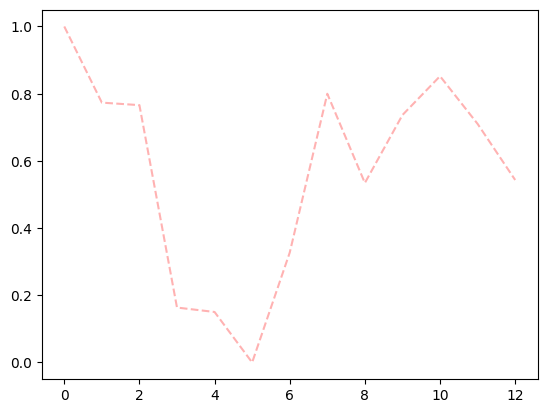

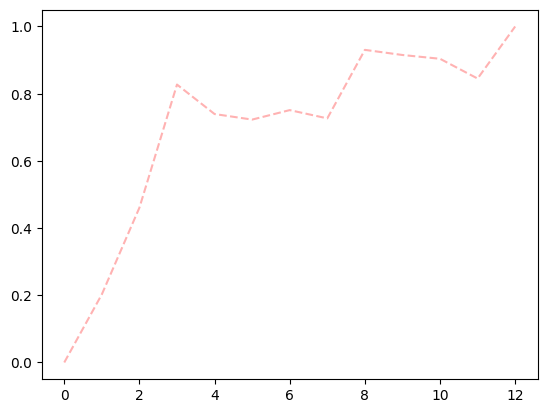

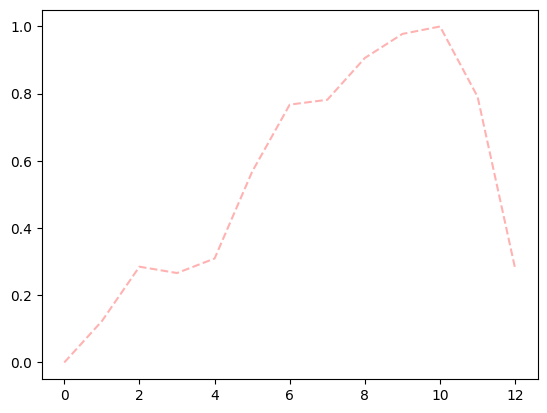

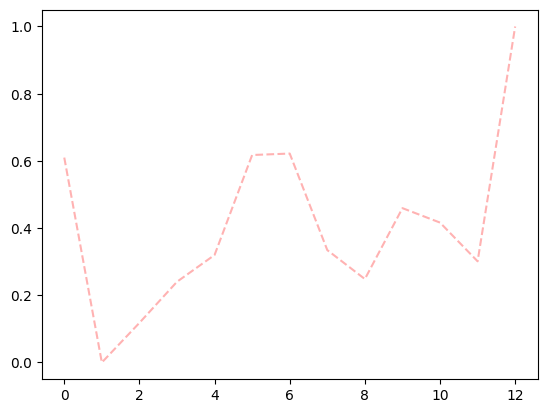

In [71]:
for y in y_values_normalized:
    plt.plot(y, color='r', linestyle='--', alpha=0.3)
    plt.show()